In [4]:
#Importing dependencies
#Importing dataset
#Preprocessing Text
#Analysing data
#Splitting data
#TF-IDF Vectoriser
#Transforming Dataset
#Creating and Evaluating Models
# BernoulliNB Model
# LinearSVC Model
# Logistic Regression Model

Step 1: Step 1: Installing the necessary libraries - This ensures all the packages required for the analysis are available.

In [5]:
# Step 1: Installing the necessary libraries - This ensures all the packages required for the analysis are available.

!pip install pandas nltk vaderSentiment matplotlib tweepy

#Step 2: Importing Libraries and Downloading NLTK Data#
This step ensures that the NLTK stopwords, tokenizers, and lemmatizers are available.

In [6]:
# utilities
import pandas as pd
import tensorflow as tf
import re                                                                           # Regular Expression Syntax. A regular expression (or RE) specifies a set of strings that matches it; it lets you check if a particular string matches a given regular expression or if a given regular expression matches a particular string.
import numpy as np
                                                                                    # vaderSentiment library (Valence Aware Dictionary and Sentiment Reasoner) helps to determine the polarity of sentiment (positive, negative, neutral) and the intensity of sentiment in textual data, eg for social media, reviews, etc.
#nltk
from nltk.corpus import stopwords                                                   #every time you deal with sentiment analysis you have to import this for some of the fuctions like Stopword from the nltk toolkit, Tokenize..
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer                                                               # when you import eg WordNetLemmatizer, it becomes a function when applied ie WordNetLemmatizer()
from nltk.corpus import wordnet
from nltk import pos_tag

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# For plotting
import matplotlib.pyplot as plt                                                     # to use matplotlib library (abbreviated as plt)
import seaborn as sns
from wordcloud import WordCloud

# sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#Step 3: Reading and loading#
dataset's comma-separated values (csv) file (and converting) into DataFrame.

In [7]:
column_names = [ 'id', 'topic', 'sentiment', 'feedback']

df = pd.read_csv('/content/drive/MyDrive/twitter_sample.csv',names = column_names)     # this makes "names" the name of each coloumn as the original dataset had no column names
#df.drop('id',axis = 1,inplace=True)

#Step 3b: Detailed data description:#

analyse - ie just have talk about the data, the distribution, the sentiment,  

In [8]:
# Visualize the original data ie
print("Original Data:")
df.head(10)

Original Data:


,id,topic,sentiment,feedback
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [9]:
df.iloc[198:203]

,id,topic,sentiment,feedback
198,2434,Borderlands,Negative,fuck it . pic.twitter.com/Wav1bacr5j
199,2434,Borderlands,Negative,Fuck it. pic.twitter.com / Wav1bacr5j
200,2434,Borderlands,Negative,fuck it. pic.wikipedia.org / Wav1bacr5j
201,2434,Borderlands,Negative,fuck it . pic.twitter.com/Wav1bacr5j
202,2434,Borderlands,Negative,V fuck it . pic.twitter.com/Wav1bacr5j


In [10]:
df.tail()

,id,topic,sentiment,feedback
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [11]:
# columns/features in df

df.columns

Index(['id', 'topic', 'sentiment', 'feedback'], dtype='object')

In [12]:
# length of df

print('lenght of data is', len(df))

lenght of data is 74682


In [13]:
df.sentiment.value_counts()

,count
sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [14]:

df.shape

(74682, 4)

In [15]:
# datatypes of all the columns

df.dtypes

,0
id,int64
topic,object
sentiment,object
feedback,object


In [16]:
# define the features and parameters

In [17]:
# Rows and columns in the dataset

print('Count of columns in the data is:  ', len(df.columns))

Count of columns in the data is:   4


In [18]:
print('Count of rows in the data is:  ', len(df))

Count of rows in the data is:   74682


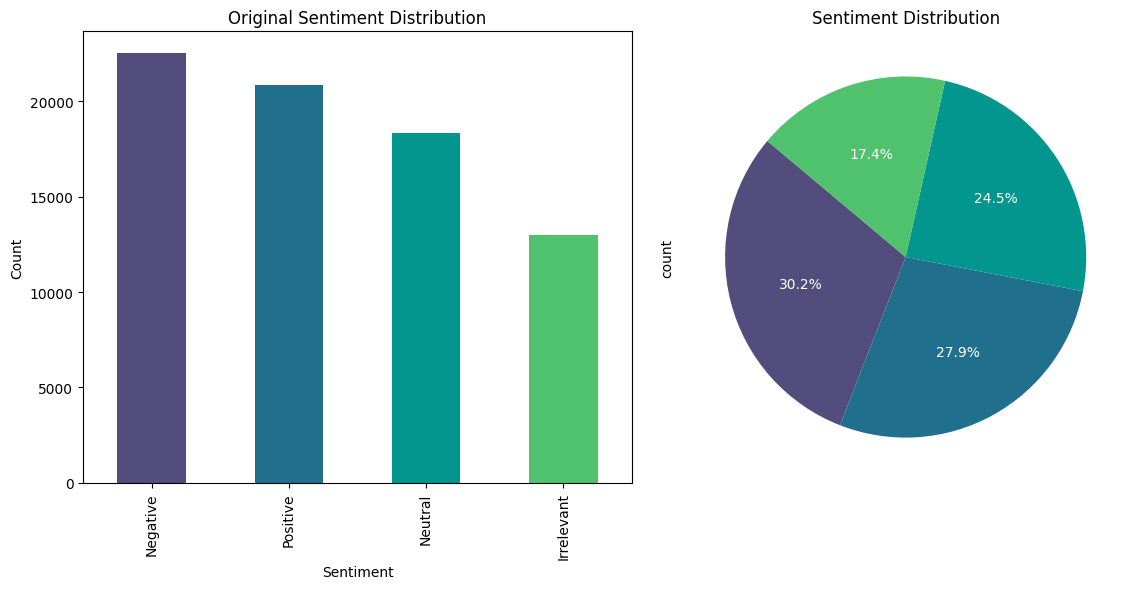

In [19]:

#Plot the original sentiment distribution

plt.figure(figsize=(12, 6))    #
plt.subplot(1, 2, 1)
df['sentiment'].value_counts().plot(kind='bar', color=['#524d7d', '#20708d', '#02968f', '#50c16d'])
plt.title('Original Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1, 2, 2)
# df['sentiment'] is a pandas Series with the sentiment data
sentiment_counts = df['sentiment'].value_counts()
# Plotting the pie chart
# plt.figure(figsize=(8, 6))
colors = ['#524d7d', '#20708d', '#02968f', '#50c16d']
sentiment_counts.plot(kind='pie', colors=colors,  textprops={'color': 'white'}, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.tight_layout()

#Data Preprocessing#
Since we have started modifying the dataframe/columns

In [20]:
# taking a sample size of 30000 rows to improve the processing speed, performance of processing power.. since the df is 74682 and the computer processing power requiremnt will be high

df1 = df.sample(n=30000, random_state=42)
df1.head(5)

,id,topic,sentiment,feedback
34877,6789,Fortnite,Irrelevant,He said told u I'm getting in that box of a br...
21704,4115,CS-GO,Positive,Yo this looks LIT! CS: GO / Overwatch combo
47008,5665,HomeDepot,Negative,@HomeDepot attention executive administrators....
7969,9369,Overwatch,Irrelevant,Guy has notified me and says that my name has ...
454,2476,Borderlands,Positive,F Loving the new DLC!!!. RhandlerR RhandlerR R...


In [21]:
df1.shape

(30000, 4)

In [22]:
df1.describe()

,id
count,30000.000000
mean,6415.686067
std,3730.344428
min,1.000000
25%,3178.000000
50%,6422.500000
75%,9561.000000
max,13200.000000


In [23]:
df1 = df1.drop(["id", "topic"], axis=1)                                         # since we only need the feedback column and sentimnrt columns, the other ones will be dropped for better understanding.

df1 = df1.reset_index(drop=True)                                                #Since we randomised the data frame, the indexes are randomised as well. The machine learning might fail if this stays like this. To correct this, we reset the indexes of our new dataframe.
df1.head(5)

,sentiment,feedback
0,Irrelevant,He said told u I'm getting in that box of a br...
1,Positive,Yo this looks LIT! CS: GO / Overwatch combo
2,Negative,@HomeDepot attention executive administrators....
3,Irrelevant,Guy has notified me and says that my name has ...
4,Positive,F Loving the new DLC!!!. RhandlerR RhandlerR R...


In [24]:
# datatypes of all the columns

df1.dtypes

,0
sentiment,object
feedback,object


In [25]:
df1.isna().sum()

,0
sentiment,0
feedback,282


In [26]:
# Since there are 282 missing data from the sample of 25000, we can drop them since they are not a repressentative data..enough
df1 = df1.dropna()
df1.head()

,sentiment,feedback
0,Irrelevant,He said told u I'm getting in that box of a br...
1,Positive,Yo this looks LIT! CS: GO / Overwatch combo
2,Negative,@HomeDepot attention executive administrators....
3,Irrelevant,Guy has notified me and says that my name has ...
4,Positive,F Loving the new DLC!!!. RhandlerR RhandlerR R...


In [27]:
df1.isna().sum()

,0
sentiment,0
feedback,0


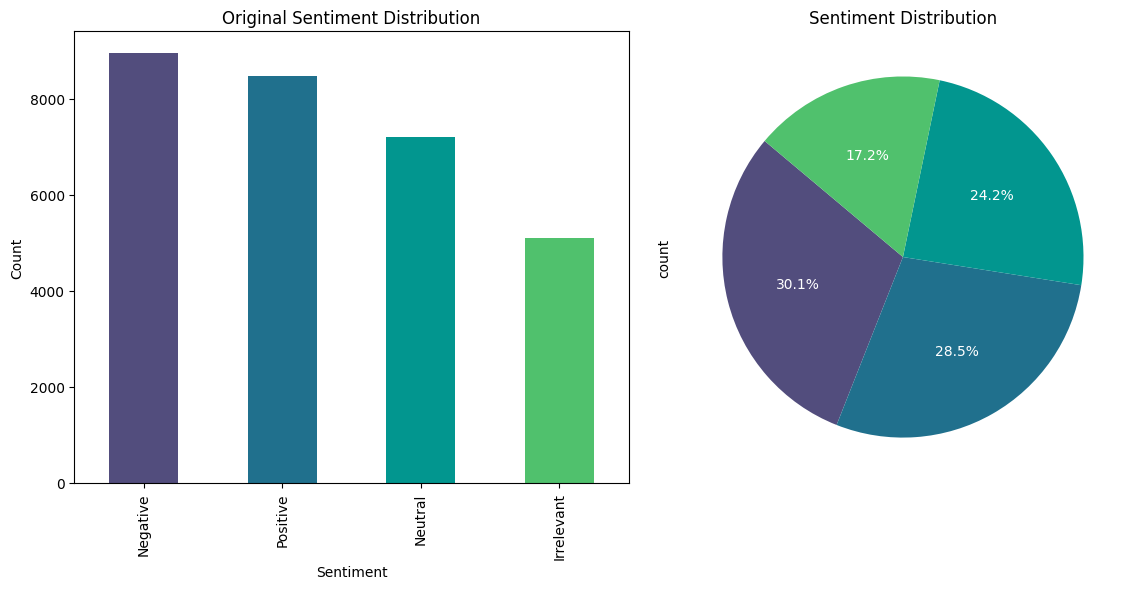

In [28]:
#Plot the original sentiment distribution

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df1['sentiment'].value_counts().plot(kind='bar', color=['#524d7d', '#20708d', '#02968f', '#50c16d'])
plt.title('Original Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1, 2, 2)
# df1['sentiment'] is a pandas Series with the sentiment data
sentiment_counts = df1['sentiment'].value_counts()
# Plotting the pie chart
# plt.figure(figsize=(8, 6))
colors = ['#524d7d', '#20708d', '#02968f', '#50c16d']
sentiment_counts.plot(kind='pie', colors=colors,  textprops={'color': 'white'}, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.tight_layout()


#STEP 4 - Data Preprocessing#
This involves converting the text to lowercase, removing special characters and stop words, and lemmatizing the words.

In [29]:
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(feedback):
    # Removing the punctuation, numbers, and special characters
    feedback = re.sub(r'http\S+|www\S+|https\S+', '', feedback, flags=re.MULTILINE)
    feedback = re.sub(r'\@\w+|\#', '', feedback)
    feedback = re.sub(r'[^A-Za-z0-9 ]+', '', feedback)

    # Convert to lowercase
    feedback = feedback.lower()
    # Tokenize the feedback text
    tokens = feedback.split()

    # Remove the stop words and do lemmatizing
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [30]:
# Apply preprocessing function to the dataframe                                                   # ie applying a function called preprocess_text to each element in the feedback column of the DataFrame df1, and then store the results ie cleaned versions of the feedback in a new column called cleaned_feedback.
df1['preprocessed_feedback'] = df1['feedback'].apply(preprocess_text)                             # ie apply the preprocess_text function on feedback column in the df1 and intialize it to another column called preprocessed_feedback in the df1
df1.head()

,sentiment,feedback,preprocessed_feedback
0,Irrelevant,He said told u I'm getting in that box of a br...,said told u im getting box brain dead controll...
1,Positive,Yo this looks LIT! CS: GO / Overwatch combo,yo look lit c go overwatch combo
2,Negative,@HomeDepot attention executive administrators....,attention executive administrator ever store g...
3,Irrelevant,Guy has notified me and says that my name has ...,guy notified say name forwarded litter list lm...
4,Positive,F Loving the new DLC!!!. RhandlerR RhandlerR R...,f loving new dlc rhandlerr rhandlerr rhandlerr...


#Further Data Analysis for visualization after preprocessing

AFTER APPLYING PREPROCESSING TO THE LEMMATIZED TEXT, A NEW visualization FOR DF1

The updated dataset with prepreocessed data will visualized and explored. df1 is retained as the name.

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29718 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sentiment              29718 non-null  object
 1   feedback               29718 non-null  object
 2   preprocessed_feedback  29718 non-null  object
dtypes: object(3)
memory usage: 928.7+ KB


Data splitting, Feature Extraction (Data Extraction), etc - this is part of preprocessing/data cleaning.
Purpose: The goal of feature extraction is to transform the cleaned text data into numerical representations that can be used by machine learning algorithms.. so as to train the model



In [32]:
df1.shape

(29718, 3)

In [33]:
df1.head(5)

,sentiment,feedback,preprocessed_feedback
0,Irrelevant,He said told u I'm getting in that box of a br...,said told u im getting box brain dead controll...
1,Positive,Yo this looks LIT! CS: GO / Overwatch combo,yo look lit c go overwatch combo
2,Negative,@HomeDepot attention executive administrators....,attention executive administrator ever store g...
3,Irrelevant,Guy has notified me and says that my name has ...,guy notified say name forwarded litter list lm...
4,Positive,F Loving the new DLC!!!. RhandlerR RhandlerR R...,f loving new dlc rhandlerr rhandlerr rhandlerr...


In [34]:
df1.describe()

,sentiment,feedback,preprocessed_feedback
count,29718,29718,29718
unique,4,28523,26753
top,Negative,"At the same time, despite the fact that there ...",
freq,8952,84,644


In [35]:
df1.isna().sum()

,0
sentiment,0
feedback,0
preprocessed_feedback,0


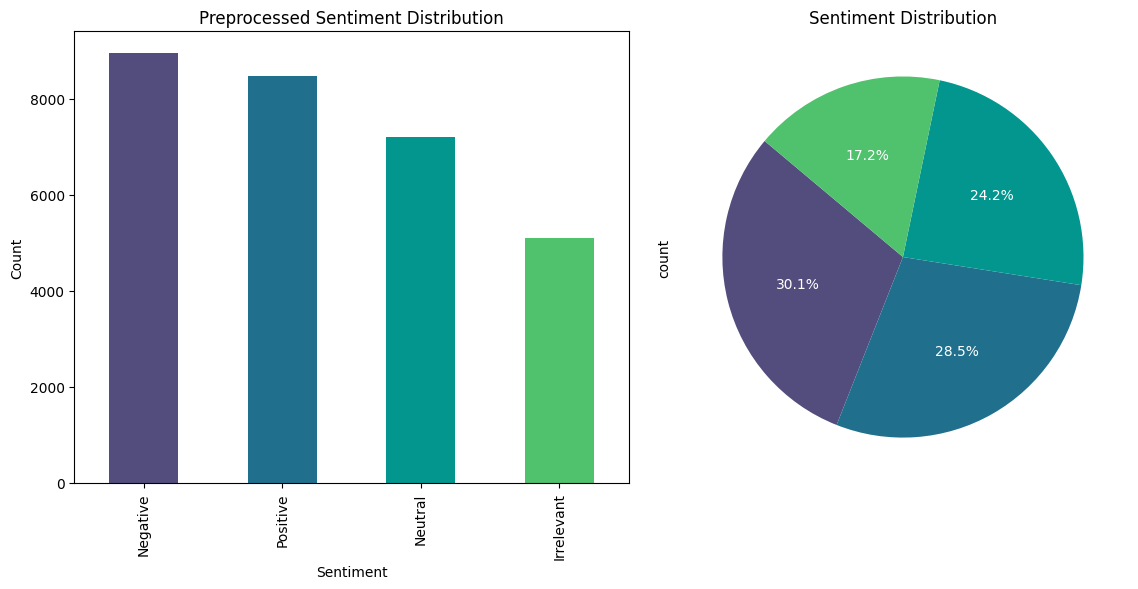

In [36]:
#Plot the preprocessed sentiment distribution

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df1['sentiment'].value_counts().plot(kind='bar', color=['#524d7d', '#20708d', '#02968f', '#50c16d'])
plt.title('Preprocessed Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1, 2, 2)
# df1['sentiment'] is a pandas Series with the sentiment data
sentiment_counts = df1['sentiment'].value_counts()

# Plotting the pie chart
# plt.figure(figsize=(8, 6))
colors = ['#524d7d', '#20708d', '#02968f', '#50c16d']
sentiment_counts.plot(kind='pie', colors=colors,  textprops={'color': 'white'}, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.tight_layout()


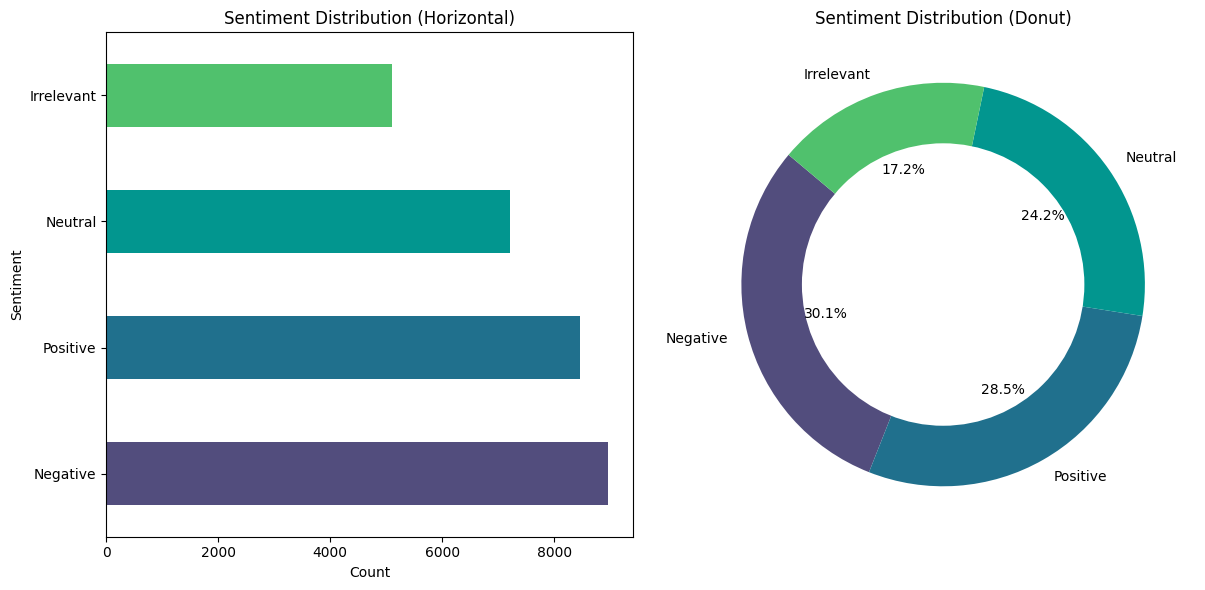

In [37]:
plt.figure(figsize=(18, 6))

# Horizontal Bar Chart
plt.subplot(1, 3, 1)
df1['sentiment'].value_counts().plot(kind='barh', color=['#524d7d', '#20708d', '#02968f', '#50c16d'])
plt.title('Sentiment Distribution (Horizontal)')
plt.xlabel('Count')
plt.ylabel('Sentiment')

# Donut Chart
plt.subplot(1, 3, 2)
sentiment_counts = df1['sentiment'].value_counts()
colors = ['#524d7d', '#20708d', '#02968f', '#50c16d']
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Sentiment Distribution (Donut)')


plt.tight_layout()
plt.show()

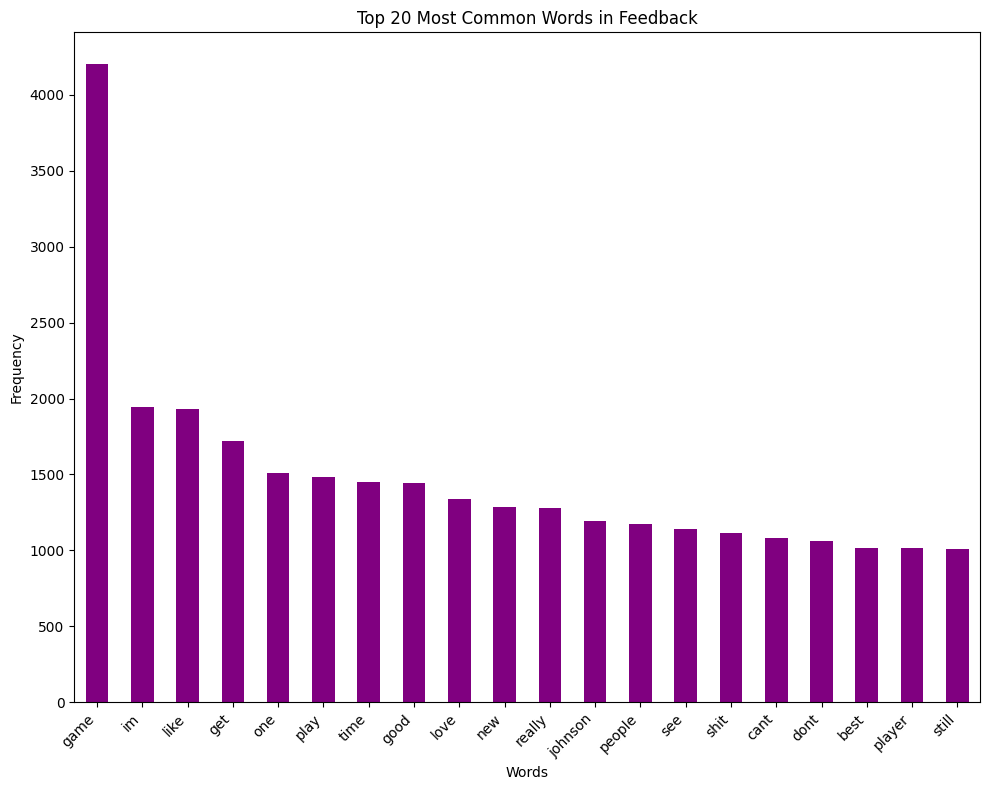

In [38]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features=100)  # Limit to top 100 words for better visualization
X = vectorizer.fit_transform(df1['preprocessed_feedback'].dropna().astype(str))

# Convert the word counts into a DataFrame for easier plotting
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum up the counts for each word to get the total frequency
word_frequencies = word_counts.sum().sort_values(ascending=False)

# Plot the top 20 most common words as a bar chart
plt.figure(figsize=(10, 8))
word_frequencies.head(20).plot(kind='bar', color='purple')
plt.title('Top 20 Most Common Words in Feedback')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

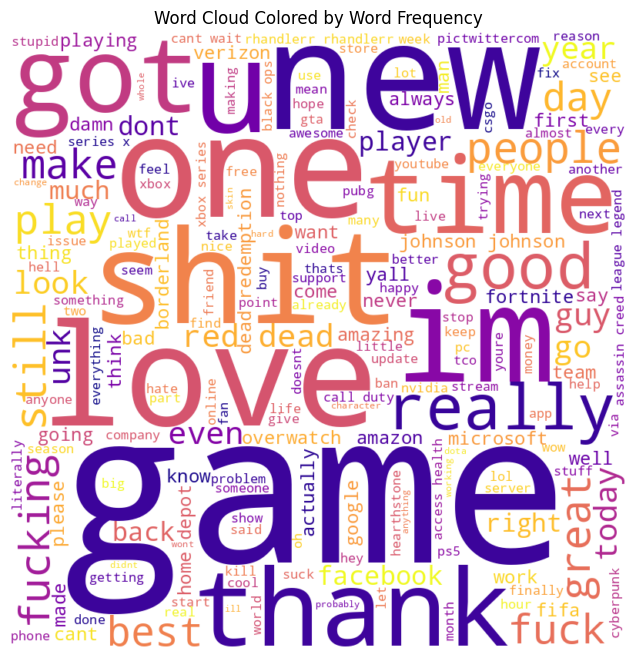

In [39]:
# Combine all cleaned feedback text into a single string for all feedback
text = ' '.join(df1['preprocessed_feedback'].astype(str).tolist())

from wordcloud import WordCloud, STOPWORDS

# Generate the word cloud with color by word frequency
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='plasma', random_state=42).generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Colored by Word Frequency')
plt.show()

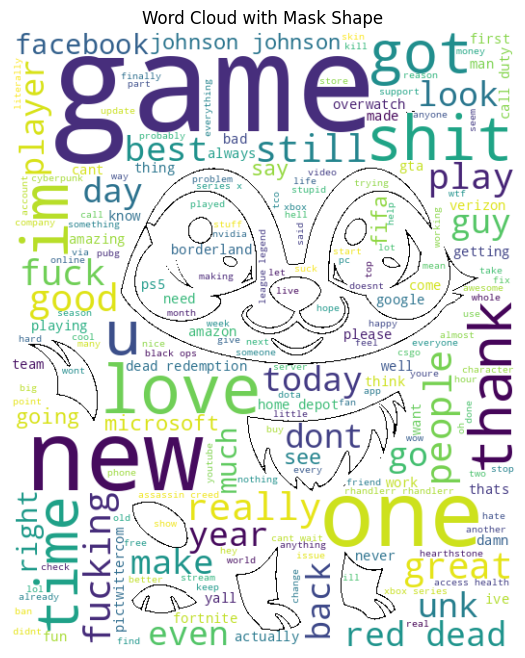

In [40]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

# Load an image to use as a mask
mask = np.array(Image.open('/content/drive/MyDrive/cat.png'))  # Provide path to your image

# Generate the word cloud with the mask
wordcloud = WordCloud(width=800, height=800, background_color='white', mask=mask, contour_width=1, contour_color='black').generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud with Mask Shape')
plt.show()

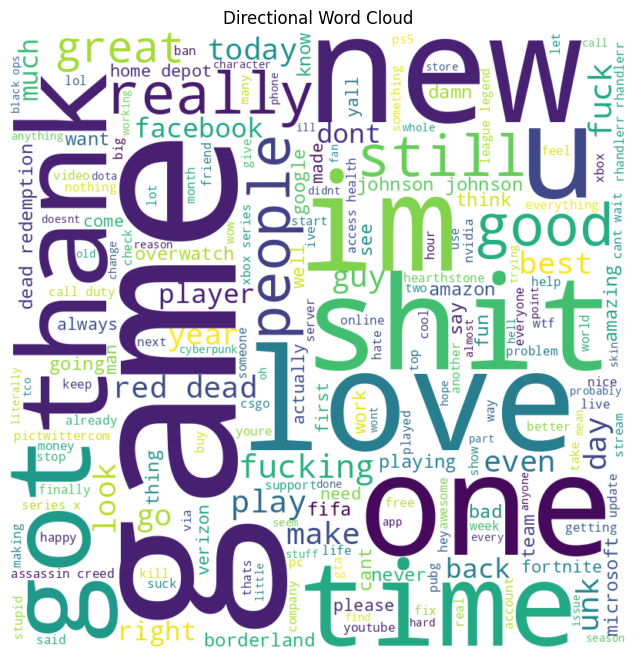

In [41]:
from wordcloud import WordCloud

# Generate the word cloud with words at different orientations
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis',
                      random_state=42, prefer_horizontal=0.5).generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Directional Word Cloud')
plt.show()

In [42]:
##########

#feature extraction/engineering before DATA MODELLING

In [43]:
# Feature extraction/engineering before DATA MODELLING

# Creating a dictionary to store the accuracy scores of different models.
model_accuracy = {}

# Initialize the TfidfVectorizer.
# TF-IDF (Term Frequency-Inverse Document Frequency): Weighs word counts by how common or rare the words are across documents.
# max_features: Specifies the maximum number of terms to be extracted. Limiting to 25000 for performance.
vectorizer = TfidfVectorizer(max_features=25000)

# Splitting the data into training and testing sets.
# 'preprocessed_feedback' is the feature (X) and 'sentiment' is the target variable (y).
X = df1['preprocessed_feedback']
y = df1['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract features from the entire dataset before splitting (Feature extraction) - This comment seems misplaced,
# as the splitting happens before the vectorization in the code. The vectorization is applied to the split data.

# Fit and transform the training data, transform the test data using the TfidfVectorizer.
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [44]:
# This cell seems to contain redundant code for plotting word clouds and initializing CountVectorizer,
# which were already done in previous cells after preprocessing.
# It is better to remove this redundant code to keep the notebook clean and focused on modeling.

# Combine all cleaned feedback text into a single string
# text = ' '.join(df1['preprocessed_feedback'].astype(str).tolist()) # Redundant

# Generate the word cloud with a fixed random state
# wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis', random_state=42).generate(text) # Redundant

# Plot the word cloud
# plt.figure(figsize=(8, 8)) # Redundant
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Preprocessed Feedback')
# plt.show() # Redundant


# Initialize the CountVectorizer
# vectorizer = CountVectorizer(max_features=100)  # Redundant, also variable name conflict with TfidfVectorizer
# X = vectorizer.fit_transform(df1['preprocessed_feedback'].dropna().astype(str)) # Redundant

#Data Modelling

In [45]:
# Data Modelling - Logistic Regression

# Initialize the Logistic Regression model
model_lr = LogisticRegression(max_iter=1000) # Renamed model variable and increased max_iter to address potential convergence warning

# Train the model using the TF-IDF transformed training data.
model_lr.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test data.
y_pred_lr = model_lr.predict(X_test_tfidf) # Renamed prediction variable

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr) # Renamed accuracy variable
report_lr = classification_report(y_test, y_pred_lr) # Renamed report variable
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr) # Renamed confusion matrix variable

# Adding the accuracy to the dictionary:
model_accuracy['Logistic Regression'] = np.around(accuracy_lr*100, 2)

print(f'Accuracy: {accuracy_lr}')
print('Classification Report:')
print(report_lr)
print('Confusion Matrix:')
print(conf_matrix_lr)

Accuracy: 0.6784993270524899
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.73      0.47      0.57      1045
    Negative       0.70      0.79      0.74      1769
     Neutral       0.63      0.62      0.62      1430
    Positive       0.68      0.74      0.71      1700

    accuracy                           0.68      5944
   macro avg       0.68      0.65      0.66      5944
weighted avg       0.68      0.68      0.67      5944

Confusion Matrix:
[[ 491  187  140  227]
 [  41 1395  175  158]
 [  78  246  883  223]
 [  65  167  204 1264]]


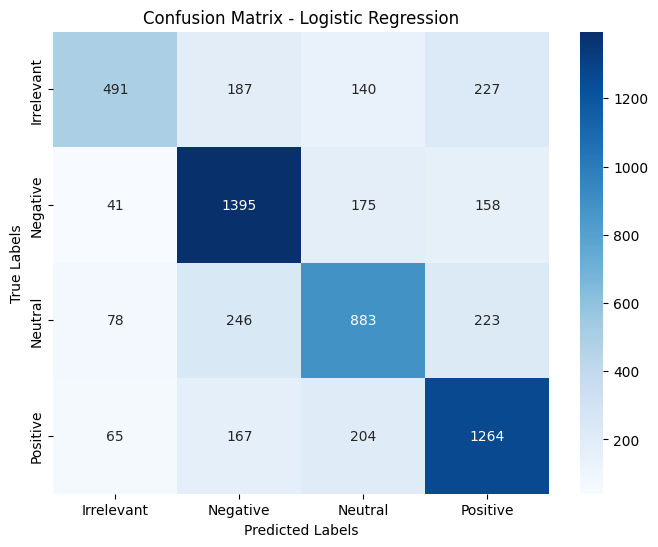

In [46]:
# Plot the confusion matrix for Logistic Regression.

plt.figure(figsize=(8, 6))
# Use the confusion matrix and model from the Logistic Regression evaluation cell.
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=model_lr.classes_, yticklabels=model_lr.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression') # Added model name to title
plt.show() # Added plt.show() for clarity

In [47]:
# Data Modelling - Random Forest Classifier

# Initialize the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42) # Renamed model variable

# Train the model using the TF-IDF transformed training data.
model_rf.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test data.
y_pred_rf = model_rf.predict(X_test_tfidf) # Renamed prediction variable

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf) # Renamed accuracy variable
report_rf = classification_report(y_test, y_pred_rf) # Renamed report variable
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf) # Renamed confusion matrix variable

# Adding the accuracy to the dictionary:
model_accuracy['Random Forest Classifier'] = np.around(accuracy_rf*100, 2) # Corrected typo "Ramdom" to "Random"

print(f'Accuracy: {accuracy_rf}')
print('Classification Report:')
print(report_rf)
print('Confusion Matrix:')
print(conf_matrix_rf)

Accuracy: 0.7875168236877523
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.92      0.62      0.74      1045
    Negative       0.78      0.87      0.82      1769
     Neutral       0.81      0.71      0.76      1430
    Positive       0.73      0.87      0.79      1700

    accuracy                           0.79      5944
   macro avg       0.81      0.77      0.78      5944
weighted avg       0.80      0.79      0.78      5944

Confusion Matrix:
[[ 644  139   81  181]
 [  13 1538   62  156]
 [  22  182 1021  205]
 [  22  108   92 1478]]


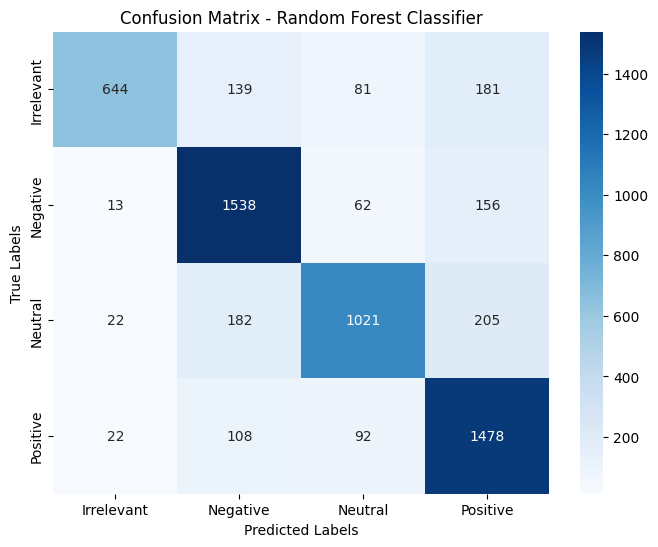

In [48]:
# Plot the confusion matrix for Random Forest Classifier.

plt.figure(figsize=(8, 6))
# Use the confusion matrix and model from the Random Forest evaluation cell.
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier') # Added model name to title
plt.show() # Added plt.show() for clarity

In [49]:
# Data Modelling - Support Vector Machine (SVM)

# For svm, to generate a TF-IDF matrix using TfidfVectorizer, and train a Support Vector Machine (SVM) classifier on the processed text data. # Redundant description

# Initialize the SVM model
model_svm = SVC(kernel='linear', random_state=42) # Renamed model variable

# Train the model using the TF-IDF transformed training data.
model_svm.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test data.
y_pred_svm = model_svm.predict(X_test_tfidf) # Renamed prediction variable

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm) # Renamed accuracy variable
report_svm = classification_report(y_test, y_pred_svm) # Renamed report variable
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm) # Renamed confusion matrix variable

# Adding the accuracy to the dictionary:
model_accuracy['Support Vector Machine'] = np.around(accuracy_svm*100, 2) # Corrected "Support vector machine" to "Support Vector Machine"

print(f'Accuracy: {accuracy_svm}')
print('Classification Report:')
print(report_svm)
print('Confusion Matrix:')
print(conf_matrix_svm)

Accuracy: 0.7082772543741588
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.72      0.56      0.63      1045
    Negative       0.73      0.80      0.76      1769
     Neutral       0.67      0.65      0.66      1430
    Positive       0.71      0.76      0.73      1700

    accuracy                           0.71      5944
   macro avg       0.71      0.69      0.70      5944
weighted avg       0.71      0.71      0.71      5944

Confusion Matrix:
[[ 583  153  127  182]
 [  61 1414  156  138]
 [  90  217  927  196]
 [  79  160  175 1286]]


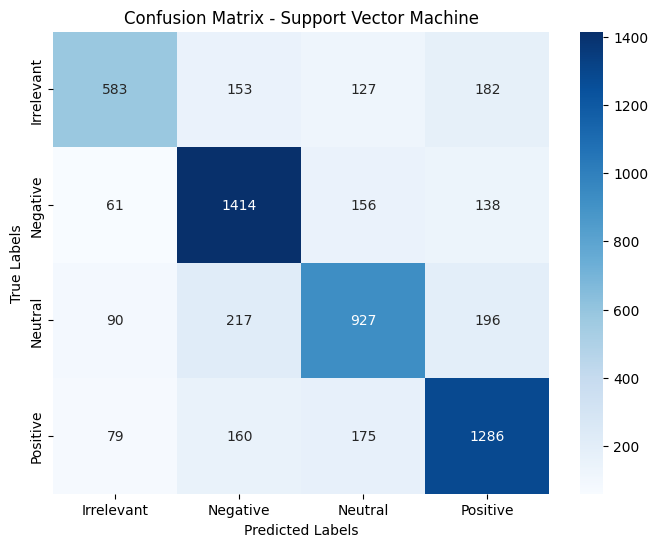

In [50]:
# Plot the confusion matrix for Support Vector Machine.

plt.figure(figsize=(8, 6))
# Use the confusion matrix and model from the SVM evaluation cell.
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=model_svm.classes_, yticklabels=model_svm.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Support Vector Machine') # Added model name to title
plt.show() # Added plt.show() for clarity

In [51]:
# This cell is a duplicate of the previous cell (QYprkJ6a973z) and can be removed.
# Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

In [52]:
# Data Modelling - Multinomial Naive Bayes

# Training the Naive Bayes model # Redundant comment

# Initialize the Naive Bayes model
model_mnb = MultinomialNB() # Renamed model variable

# Train the model using the TF-IDF transformed training data.
model_mnb.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test data.
y_pred_mnb = model_mnb.predict(X_test_tfidf) # Renamed prediction variable

# Evaluate the model
accuracy_mnb = accuracy_score(y_test, y_pred_mnb) # Renamed accuracy variable
report_mnb = classification_report(y_test, y_pred_mnb) # Renamed report variable
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb) # Renamed confusion matrix variable

# Adding the accuracy to the dictionary:
model_accuracy['Multinomial Naive Bayes'] = np.around(accuracy_mnb*100, 2)

print(f'Accuracy: {accuracy_mnb}')
print('Classification Report:')
print(report_mnb)
print('Confusion Matrix:')
print(conf_matrix_mnb)

Accuracy: 0.6182705248990579
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.93      0.20      0.32      1045
    Negative       0.57      0.88      0.69      1769
     Neutral       0.74      0.43      0.54      1430
    Positive       0.60      0.77      0.67      1700

    accuracy                           0.62      5944
   macro avg       0.71      0.57      0.56      5944
weighted avg       0.68      0.62      0.59      5944

Confusion Matrix:
[[ 205  389   84  367]
 [   3 1549   63  154]
 [   9  460  619  342]
 [   3  319   76 1302]]


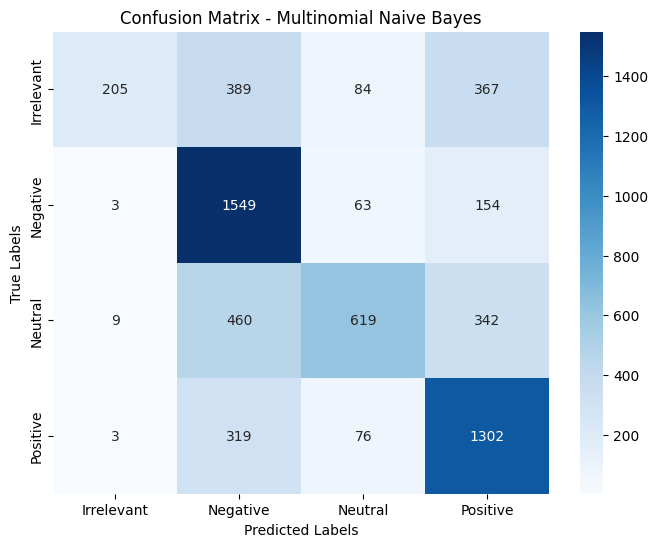

In [53]:
# Plot the confusion matrix for Multinomial Naive Bayes.

plt.figure(figsize=(8, 6))
# Use the confusion matrix and model from the Multinomial Naive Bayes evaluation cell.
sns.heatmap(conf_matrix_mnb, annot=True, fmt='d', cmap='Blues', xticklabels=model_mnb.classes_, yticklabels=model_mnb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Multinomial Naive Bayes') # Added model name to title
plt.show() # Added plt.show() for clarity

In [54]:
# Data Modelling - Bernoulli Naive Bayes

# Training with BernoulliNB model # Redundant comment

# Initialize the BernoulliNB model
model_bnb = BernoulliNB() # Renamed model variable

# Train the model using the TF-IDF transformed training data.
model_bnb.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test data.
y_pred_bnb = model_bnb.predict(X_test_tfidf) # Renamed prediction variable

# Evaluate the model
accuracy_bnb = accuracy_score(y_test, y_pred_bnb) # Renamed accuracy variable
report_bnb = classification_report(y_test, y_pred_bnb) # Renamed report variable
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb) # Renamed confusion matrix variable

# Adding the accuracy to the dictionary:
model_accuracy['Bernoulli Naive Bayes'] = np.around(accuracy_bnb*100, 2)

print(f'Accuracy: {accuracy_bnb}')
print('Classification Report:')
print(report_bnb)
print('Confusion Matrix:')
print(conf_matrix_bnb)

Accuracy: 0.6381224764468372
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.88      0.30      0.45      1045
    Negative       0.66      0.79      0.72      1769
     Neutral       0.78      0.42      0.55      1430
    Positive       0.55      0.87      0.67      1700

    accuracy                           0.64      5944
   macro avg       0.72      0.60      0.60      5944
weighted avg       0.69      0.64      0.62      5944

Confusion Matrix:
[[ 317  238   62  428]
 [  11 1400   58  300]
 [  28  310  605  487]
 [   6  170   53 1471]]


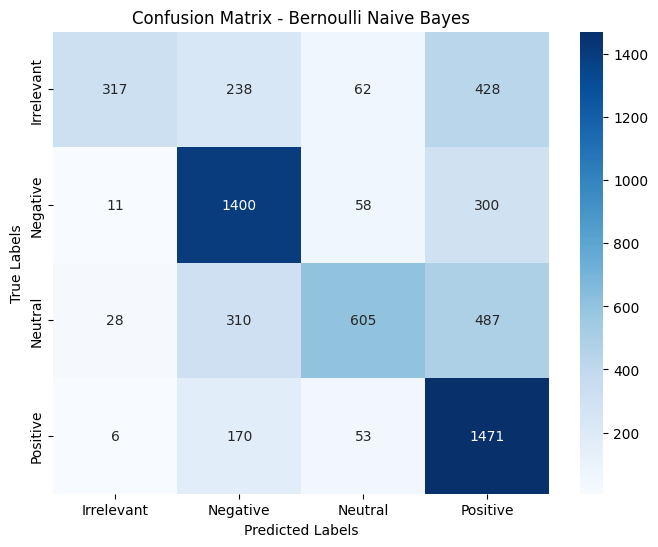

In [55]:
# Plot the confusion matrix for Bernoulli Naive Bayes.

plt.figure(figsize=(8, 6))
# Use the confusion matrix and model from the Bernoulli Naive Bayes evaluation cell.
sns.heatmap(conf_matrix_bnb, annot=True, fmt='d', cmap='Blues', xticklabels=model_bnb.classes_, yticklabels=model_bnb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Bernoulli Naive Bayes') # Added model name to title
plt.show() # Added plt.show() for clarity

In [56]:
# Data Modelling - Gradient Boosting Classifier

# Initialize the TfidfVectorizer - This initialization is repeated and can be removed.
# vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2)) # Redundant

# Fit and transform the training data, transform the test data - This transformation is repeated and can be removed.
# X_train_tfidf = vectorizer.fit_transform(X_train) # Redundant
# X_test_tfidf = vectorizer.transform(X_test) # Redundant

# Initialize the Gradient Boosting model
model_gb = GradientBoostingClassifier(random_state=42) # Renamed model variable

# Train the model using the TF-IDF transformed training data.
model_gb.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test data.
y_pred_gb = model_gb.predict(X_test_tfidf) # Renamed prediction variable

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb) # Renamed accuracy variable
report_gb = classification_report(y_test, y_pred_gb) # Renamed report variable
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb) # Renamed confusion matrix variable

# Adding the accuracy to the dictionary:
model_accuracy['Gradient Boosting'] = np.around(accuracy_gb*100, 2) # Corrected "Gradient boosting" to "Gradient Boosting"

print(f'Accuracy: {accuracy_gb}')
print('Classification Report:')
print(report_gb)
print('Confusion Matrix:')
print(conf_matrix_gb)

Accuracy: 0.5090847913862718
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.68      0.16      0.26      1045
    Negative       0.45      0.80      0.58      1769
     Neutral       0.56      0.34      0.42      1430
    Positive       0.56      0.57      0.56      1700

    accuracy                           0.51      5944
   macro avg       0.56      0.47      0.46      5944
weighted avg       0.55      0.51      0.48      5944

Confusion Matrix:
[[ 169  479   89  308]
 [  31 1408  158  172]
 [  27  644  482  277]
 [  22  577  134  967]]


In [57]:
# Display the accuracy of all models.

# to view the accuracy of the models together # Redundant comment

display(model_accuracy)

{'Logistic Regression': np.float64(67.85),
 'Random Forest Classifier': np.float64(78.75),
 'Support Vector Machine': np.float64(70.83),
 'Multinomial Naive Bayes': np.float64(61.83),
 'Bernoulli Naive Bayes': np.float64(63.81),
 'Gradient Boosting': np.float64(50.91)}

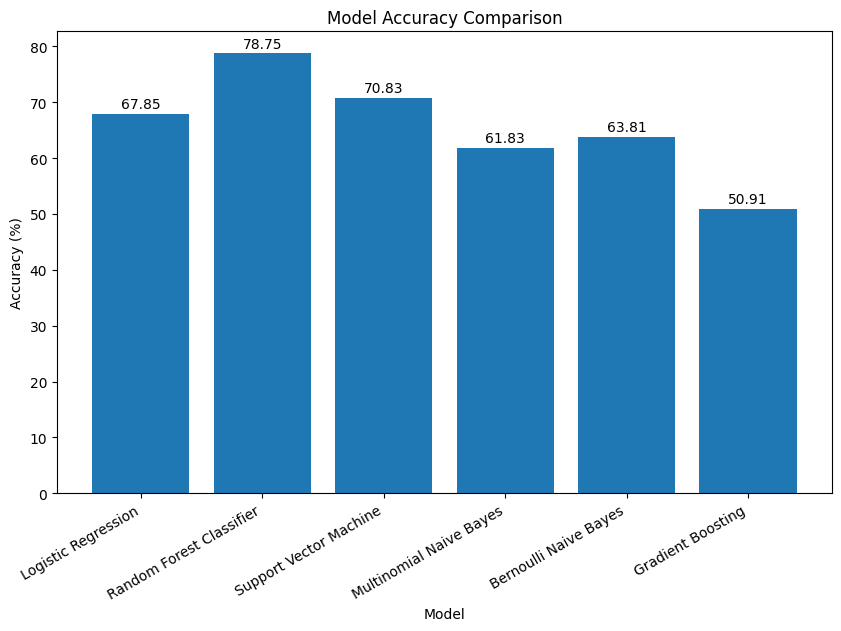

In [58]:
# Plot the accuracy comparison of all models.

plt.figure(figsize=(10, 6))

plt.bar(model_accuracy.keys(),
        model_accuracy.values())

# Rotate x-ticks by 30 degrees for better readability.
plt.xticks(rotation=30, ha='right')

# Add value labels on top of the bars.
for key, value in model_accuracy.items():
    plt.text(key, value + 0.5, str(value), ha='center', va='bottom')

# Add labels and title for clarity.
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.show() # Added plt.show() for clarity

In [59]:
# This cell is a duplicate of a previous plotting cell (XN-t3TpbvAtO) and can be removed.
# Plotting the preprocessed sentiment distribution. This step generates a bar chart showing the count of positive, negative, and neutral sentiments (ie count of polarity of the review's sentiment)


#Plot the preprocessed sentiment distribution

# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)   # 1 stands for 1 row, 2 is 2 columns and 1 is first image
# df1['sentiment'].value_counts().plot(kind='bar', color=['#524d7d', '#20708d', '#02968f', '#50c16d'])
# plt.title('Preprocessed Sentiment Distribution')
# plt.xlabel('Sentiment')
# plt.ylabel('Count')
# plt.tight_layout()

# plt.subplot(1, 2, 2)        # 1 stands for 1 row, 2 is 2 columns and 2 is second image
# # df1['sentiment'] is a pandas Series with the sentiment data
# sentiment_counts = df1['sentiment'].value_counts()
# # Plotting the pie chart
# # plt.figure(figsize=(8, 6))
# colors = ['#524d7d', '#20708d', '#02968f', '#50c16d']
# sentiment_counts.plot(kind='pie', colors=colors,  textprops={'color': 'white'}, autopct='%1.1f%%', startangle=140)
# plt.title('Preprocessed Sentiment Distribution')
# plt.tight_layout()

In [60]:
# Testing the model on new data

new_data = [
    "I absolutely loved the new phone! It's amazing and works perfectly.",
    "The movie was quite boring and too long for my taste.",
    "Had a decent experience at the restaurant, nothing special but not bad either.",
    "The customer service was outstanding! They went above and beyond to help me.",
    "I didn't like the new update. It made things worse rather than improving them.",
    "The product is okay, but it could be better. It's just average.",
    "Great quality and fast shipping! I'm very satisfied with my purchase.",
    "The concert was a total disappointment. The sound quality was terrible.",
    "I don't have strong feelings about this product, it just works as expected.",
    "Fantastic performance by the team! They really exceeded my expectations."]

# Set pandas option to display full column width.
pd.set_option('display.max_colwidth', None)
# Create a DataFrame for the new data.
new_data_df = pd.DataFrame({'New Reviews': new_data})
display(new_data_df.head())

,New Reviews
0,I absolutely loved the new phone! It's amazing and works perfectly.
1,The movie was quite boring and too long for my taste.
2,"Had a decent experience at the restaurant, nothing special but not bad either."
3,The customer service was outstanding! They went above and beyond to help me.
4,I didn't like the new update. It made things worse rather than improving them.


In [61]:
# Preprocess the new data using the same preprocess_text function.
new_data_df['cleaned_text'] = new_data_df['New Reviews'].apply(preprocess_text)

# Transform the preprocessed new data using the *same* trained vectorizer used for model training.
# It's important to use the vectorizer fitted on the training data to ensure consistency.
X_new = vectorizer.transform(new_data_df['cleaned_text'])

# Make predictions on the new data using the trained Random Forest Classifier (as it had the highest accuracy).
# If you want to use a different model, change 'model_rf' to the desired model variable (e.g., model_lr, model_svm, etc.)
new_data_df['predicted_sentiment'] = model_rf.predict(X_new) # Using model_rf as it performed best

# View the predictions.
display(new_data_df.head(10))

,New Reviews,cleaned_text,predicted_sentiment
0,I absolutely loved the new phone! It's amazing and works perfectly.,absolutely loved new phone amazing work perfectly,Positive
1,The movie was quite boring and too long for my taste.,movie quite boring long taste,Negative
2,"Had a decent experience at the restaurant, nothing special but not bad either.",decent experience restaurant nothing special bad either,Negative
3,The customer service was outstanding! They went above and beyond to help me.,customer service outstanding went beyond help,Negative
4,I didn't like the new update. It made things worse rather than improving them.,didnt like new update made thing worse rather improving,Positive
5,"The product is okay, but it could be better. It's just average.",product okay could better average,Positive
6,Great quality and fast shipping! I'm very satisfied with my purchase.,great quality fast shipping im satisfied purchase,Positive
7,The concert was a total disappointment. The sound quality was terrible.,concert total disappointment sound quality terrible,Negative
8,"I don't have strong feelings about this product, it just works as expected.",dont strong feeling product work expected,Negative
9,Fantastic performance by the team! They really exceeded my expectations.,fantastic performance team really exceeded expectation,Positive


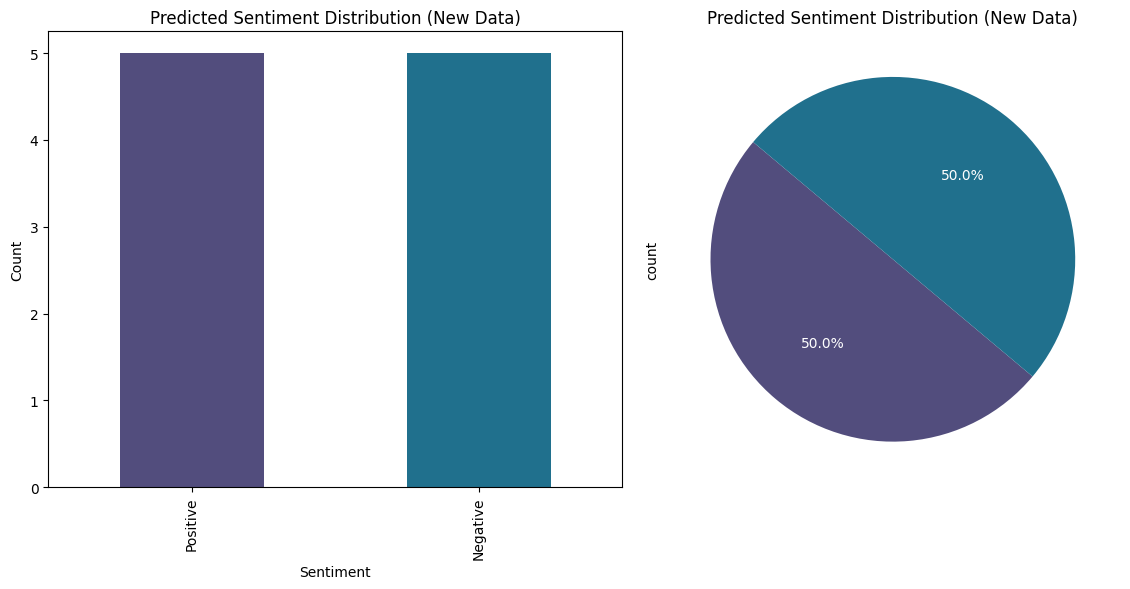

In [62]:
# Plot the predicted sentiment distribution for the new data.

# Plotting the preprocessed sentiment distribution. This step generates a bar chart showing the count of positive, negative, and neutral sentiments (ie count of polarity of the review's sentiment) # Redundant comment


# Plot the predicted sentiment distribution using bar and pie charts.

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
new_data_df['predicted_sentiment'].value_counts().plot(kind='bar', color=['#524d7d', '#20708d', '#02968f', '#50c16d'])
plt.title('Predicted Sentiment Distribution (New Data)') # Changed title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1, 2, 2)
sentiment_counts = new_data_df['predicted_sentiment'].value_counts()
colors = ['#524d7d', '#20708d', '#02968f', '#50c16d']
sentiment_counts.plot(kind='pie', colors=colors,  textprops={'color': 'white'}, autopct='%1.1f%%', startangle=140)
plt.title('Predicted Sentiment Distribution (New Data)') # Changed title
plt.tight_layout()
plt.show() # Added plt.show() for clarity